<h1>Imports and reading data </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (16598, 11)


In [5]:
print(f"Data types: \n{df.dtypes}")

Data types: 
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [6]:
print(f'Number of NaN values: \n{df.isna().sum()}')

Number of NaN values: 
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


<h2>Data preparation</h2>

<h4>Removing duplicates</h4>

In [7]:

df = df.loc[~df.duplicated(subset=['Name','Platform','Year'])].reset_index(drop=True).copy()

In [8]:
df.loc[df.duplicated(subset=['Name','Platform'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.0,0.17,0.02,0.10,1.29
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.0,0.48,0.00,0.00,0.48
11676,11678,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.0,0.06,0.00,0.02,0.08


In [9]:
df.query('Name == "Sonic the Hedgehog"')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
254,255,Sonic the Hedgehog,GEN,1991.0,Platform,Sega,3.03,0.91,0.26,0.13,4.34
1715,1717,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66,1.18
1983,1985,Sonic the Hedgehog,X360,2006.0,Platform,Sega,0.44,0.49,0.00,0.11,1.05
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48


In [10]:
df = df.drop([df.index[4145]]).reset_index(drop=True).copy()

<h4>Dealing with NaN values</h4>

In [11]:
df.dropna(subset='Publisher', inplace=True)


In [12]:
df["Year"].fillna(df["Year"].median(),inplace = True)

In [13]:
# Convertin "Year" column from float to integer 
df['Year'] = df['Year'].astype(np.int64)


<h2>Data visualization</h2>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS')])

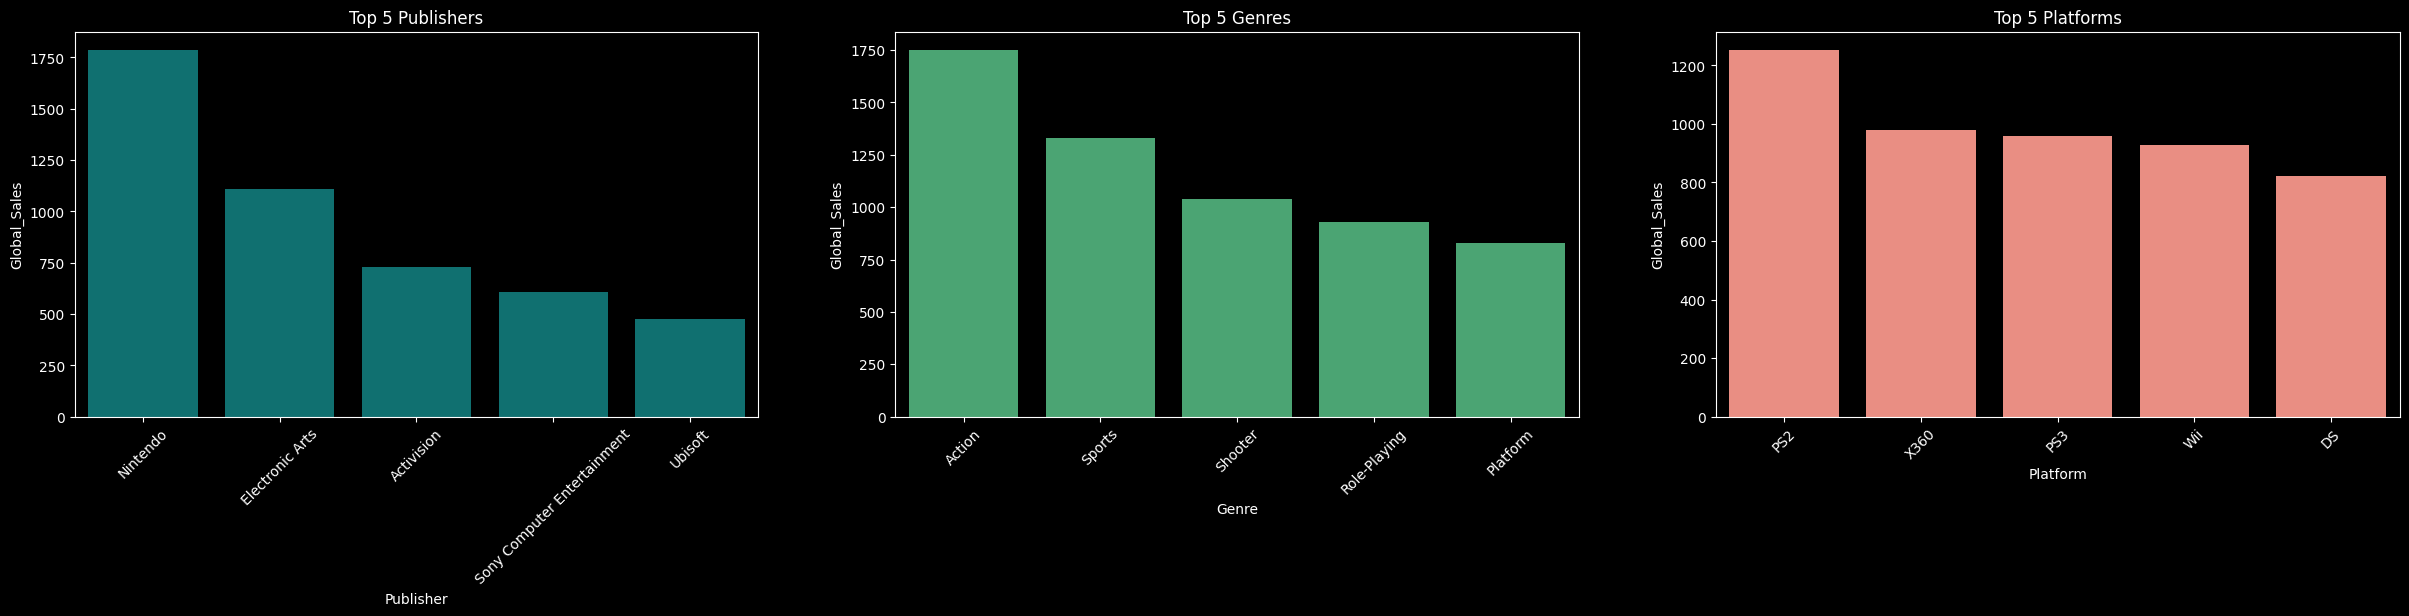

In [14]:
Global_Sales_Platform = df.pivot_table('Global_Sales', columns='Platform', aggfunc=sum).T\
        .sort_values(by='Global_Sales', ascending=False).iloc[:5]

Global_Sales_Genre = df.pivot_table('Global_Sales', columns='Genre', aggfunc=sum).T\
        .sort_values(by='Global_Sales', ascending=False).iloc[:5]

Global_Sales_Publisher = df.pivot_table('Global_Sales', columns='Publisher', aggfunc=sum).T\
        .sort_values(by='Global_Sales', ascending=False).iloc[:5]

plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
sns.barplot(data=Global_Sales_Publisher,x=Global_Sales_Publisher.index, y='Global_Sales', color='teal')
plt.title('Top 5 Publishers')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.barplot(data=Global_Sales_Genre,x=Global_Sales_Genre.index, y='Global_Sales', color='mediumseagreen')
plt.title('Top 5 Genres')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.barplot(data=Global_Sales_Platform,x=Global_Sales_Platform.index, y='Global_Sales', color='salmon')
plt.title('Top 5 Platforms')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PS3'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'X360'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'PS')])

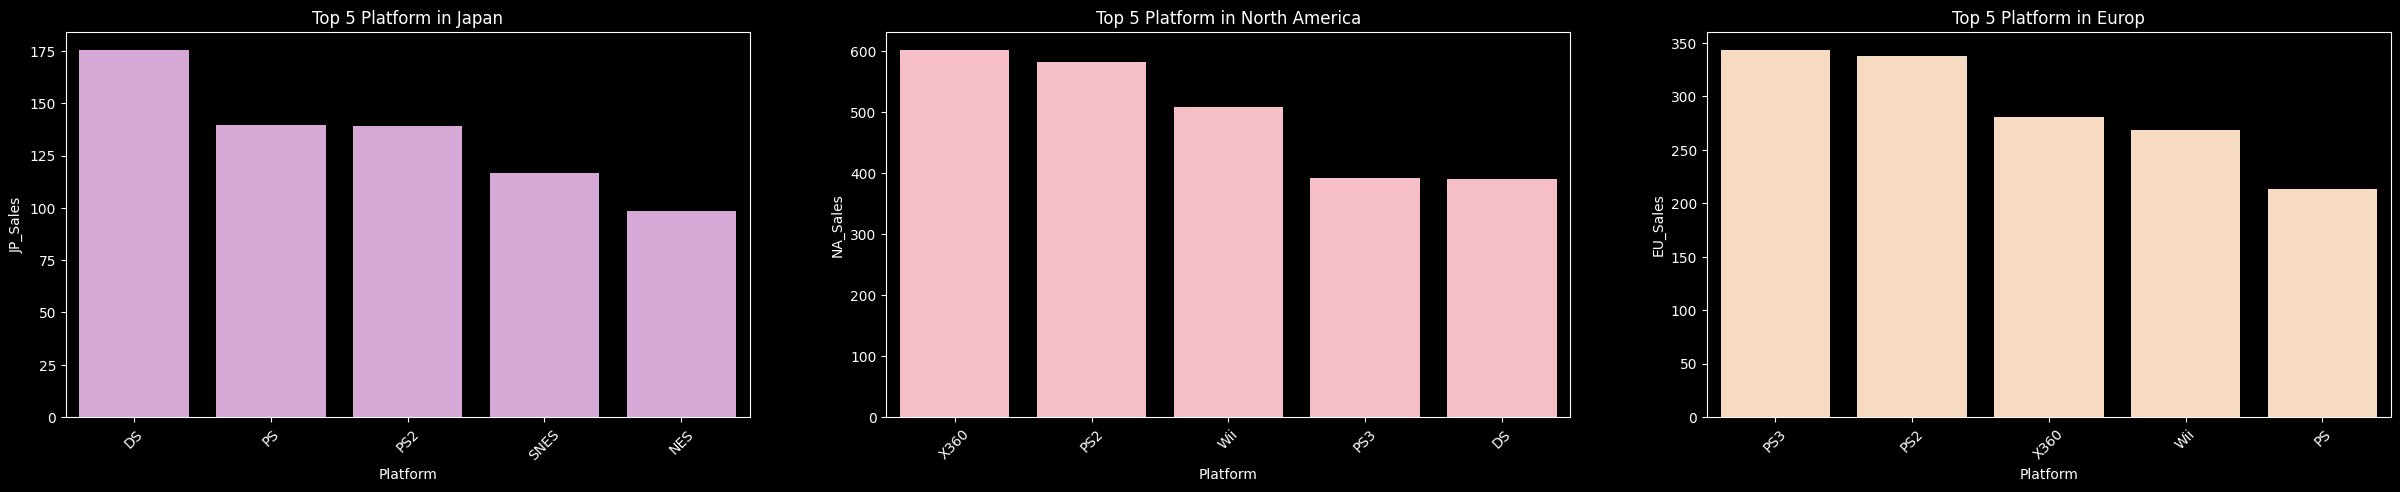

In [15]:
NA_Sales_Platform = df.pivot_table('NA_Sales', columns='Platform', aggfunc=sum).T\
        .sort_values(by='NA_Sales', ascending=False).iloc[:5]

EU_Sales_Platform = df.pivot_table('EU_Sales', columns='Platform', aggfunc=sum).T\
        .sort_values(by='EU_Sales', ascending=False).iloc[:5]

JP_Sales_Platform = df.pivot_table('JP_Sales', columns='Platform', aggfunc=sum).T\
        .sort_values(by='JP_Sales', ascending=False).iloc[:5]



plt.figure(figsize=(30,5))
plt.subplot(1,3,1)
sns.barplot(data=JP_Sales_Platform,x=JP_Sales_Platform.index, y='JP_Sales', color='plum')
plt.title('Top 5 Platform in Japan')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.barplot(data=NA_Sales_Platform,x=NA_Sales_Platform.index, y='NA_Sales', color='lightpink')
plt.title('Top 5 Platform in North America')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.barplot(data=EU_Sales_Platform,x=EU_Sales_Platform.index, y='EU_Sales', color='peachpuff')
plt.title('Top 5 Platform in Europ')
plt.xticks(rotation=45)



(array([1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

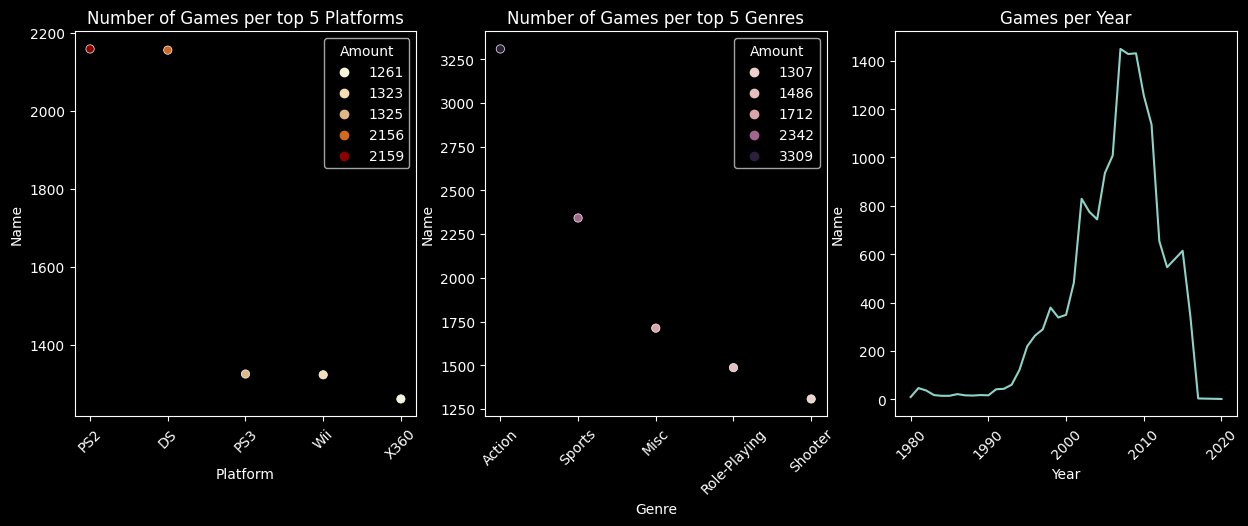

In [16]:
from seaborn import objects as ob

Games_per_Platform = df.groupby(['Platform'])['Name'].count().reset_index().sort_values('Name', ascending=False)[:5]

Games_per_Genre = df.groupby(['Genre'])['Name'].count().reset_index().sort_values('Name', ascending=False)[:5]

Games_per_Year = df.groupby(['Year'])['Name'].count().reset_index().sort_values('Name', ascending=False)
Games_per_Year

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(data = Games_per_Platform, x = 'Platform',  y = "Name", hue= 'Name',palette=['beige','wheat','burlywood','chocolate','darkred'])
plt.legend(title='Amount')
plt.title('Number of Games per top 5 Platforms')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.scatterplot(data = Games_per_Genre, x = 'Genre',  y = "Name", hue='Name')
plt.legend(title='Amount')
plt.title('Number of Games per top 5 Genres')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.lineplot(data = Games_per_Year, x = 'Year',  y = "Name")
plt.title('Games per Year')
plt.xticks(rotation=45)
